<img src="./logo_UNSAM.jpg" align="right" width="300" />  -->
#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1 - Síntesis de Señales

#### Sofía Gervasi

## Introducción

El presente trabajo tiene como objetivo principal la síntesis y representación gráfica de un conjunto de señales. Posteriormente, se llevará a cabo el análisis de la ortogonalidad entre la señal sinusoidal de referencia y el resto de la señales propuestas. Del mismo modo, se estudiará la autocorrelación de la señal original y la correlación cruzada con las demás. 

## Marco Teórico
### Producto Interno y Ortogonalidad
El producto interno entre dos señales discretas se define como:  

$$ \langle x, y \rangle = \sum_{n=0}^{N-1} x[n]\,y[n] $$  

Cuando este valor es cero, es decir $ \langle x, y \rangle = 0 $, se dice que las señales son ortogonales. Esto significa que, dentro del intervalo de análisis, una señal no contiene información de la otra. En caso contrario, si el producto interno es distinto de cero, las señales no son ortogonales y existe un cierto grado de correlación entre ambas.

### Correlación Cruzada
La correlación cruzada entre dos señales discretas $x[n]$ e $y[n]$ se expresa como:  

$$ R_{xy}[k] = \sum_{n=0}^{N-1} x[n]\,y[n+k] $$ 

Cuando se evalúa en $k = 0$, la correlación cruzada coincide exactamente con el producto interno:  

$$ R_{xy}[0] = \langle x, y \rangle $$  

Esto permite afirmar que, si $R_{xy}[0] = 0$, las señales son ortogonales. Por el contrario, si $R_{xy}[0]$ resulta grande en magnitud, inferimos que las señales no son ortogonales y que hay cierta informción que tienen en común. 

### Autocorrelación
La autocorrelación corresponde al caso particular en el que se analiza la correlación de una señal consigo misma. En forma discreta se escribe como:  

$$ R_{xx}[k] = \sum_{n=0}^{N-1} x[n]\,x[n+k] $$ ,  

En el caso particular de $k = 0$, se obtiene:  

$$ R_{xx}[0] = \sum_{n=0}^{N-1} x^2[n] $$  

En el caso que la señal sea de duración finita, el valor de $R_{xx}[0]$ corresponde a la energía de dicha señal

$$ E_x = \sum_{n=0}^{N-1} x^2[n] $$  

## Análisis y Desarrollo

### 1. Sintetizar y graficar las siguientes señales:

i. Una señal sinusoidal de 2KHz.

ii. Misma señal amplificada y desfazada en π/2.

iii. Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

iv. Señal anterior recortada al 75% de su amplitud.

v. Una señal cuadrada de 4KHz.

vi. Un pulso rectangular de 10ms.


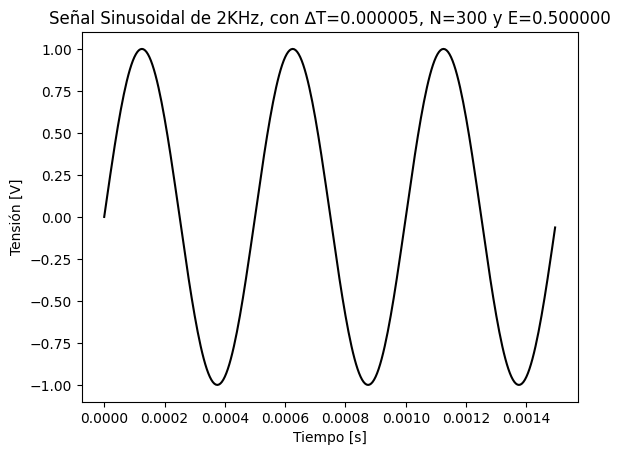

In [125]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 16 18:57:37 2025

@author: Sofía
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 

#Defino variables
vmax= 1  #Volts 
dc = 0  #Volts
ff = 2000  #Hz
ph = 0 #Radianes
nn = 300 # numero de muestras para 3T
fs = 200000 #Hz
Ts=1/fs

#Defino la funcion
def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    tt= np.linspace(0,(nn-1)*Ts,nn).flatten()
    xx = vmax* np.sin(2 * np.pi * ff * tt + ph) + dc
    return xx, tt

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

E=(1/nn)*np.sum(xx**2)

plt.figure()
plt.title('Señal Sinusoidal de 2KHz, con ∆T={:f}, N={:d} y E={:f}'.format(Ts,nn,E))
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.plot(tt, xx, color='black')

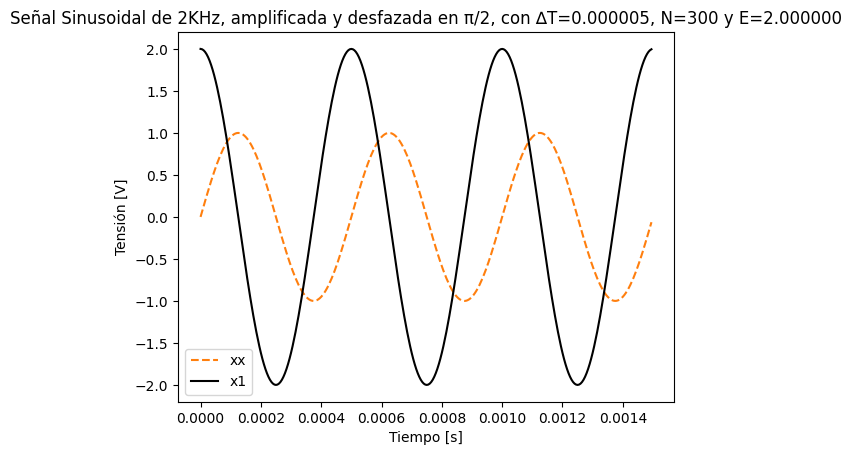

In [126]:
vmax= 2
ph=np.pi/2
Ts=1/fs

x1, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

E=(1/nn)*np.sum(x1**2)

plt.figure()
plt.title('Señal Sinusoidal de 2KHz, amplificada y desfazada en π/2, con ∆T={:f}, N={:d} y E={:f}'.format(Ts,nn,E))
plt.plot(tt, xx, color='tab:orange',linestyle='--',label='xx')
plt.plot(tt, x1, color='black',label='x1')
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.legend()

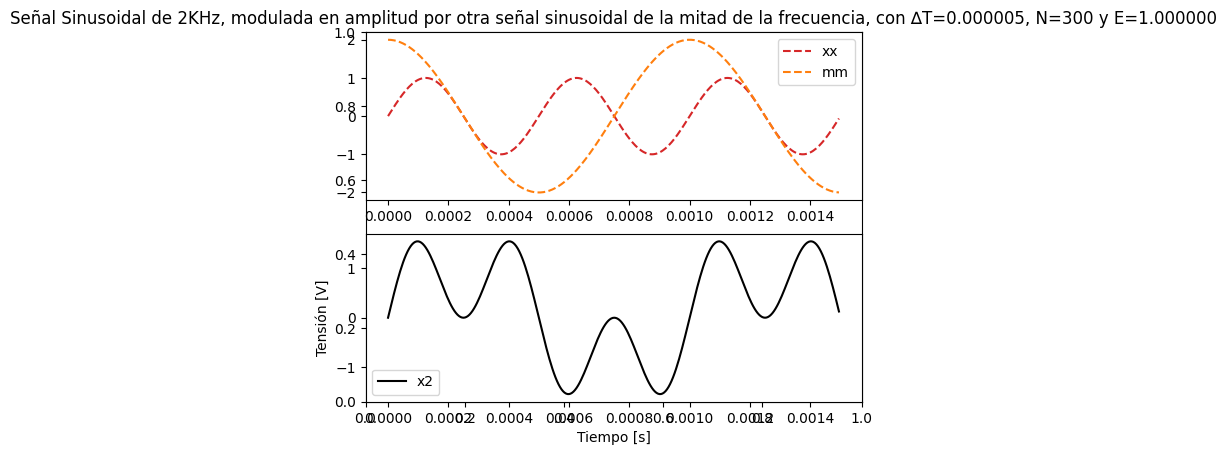

In [127]:
fm=1000 #Frecuencia de la señal moduladora
mm=2*np.sin(2 * np.pi * fm * tt + ph) #señal moduladora
Ts=1/fs

x2=xx*mm
E=(1/nn)*np.sum(x2**2)

plt.figure()
plt.title('Señal Sinusoidal de 2KHz, modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia, con ∆T={:f}, N={:d} y E={:f}'.format(Ts,nn,E))
plt.subplot(211)
plt.plot(tt, xx, color='tab:red', linestyle='--',label='xx')
plt.plot(tt, mm, color='tab:orange', linestyle='--',label='mm')
plt.legend()
plt.subplot(212)
plt.plot(tt, x2, color='black',label='x2')
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.legend()

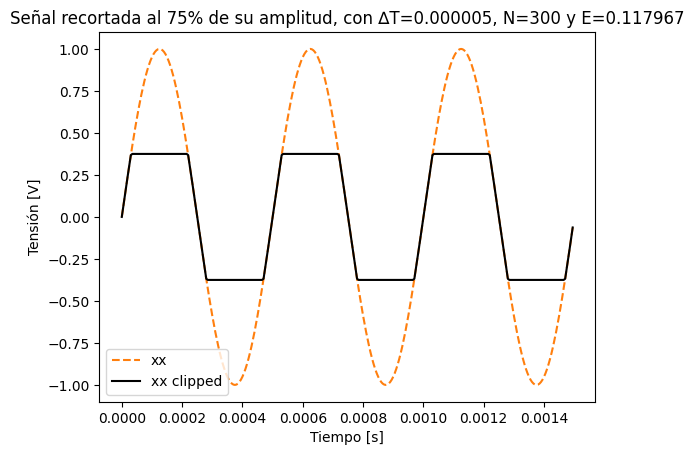

In [128]:
vmax= 1  #Volts 
dc = 0  #Volts
ff = 2000  #Hz
ph = 0 #Radianes
nn = 300 # N
fs = 200000 #Hz
Ts=1/fs

def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    tt= np.linspace(0,(nn-1)*Ts,nn).flatten()
    xx = vmax* np.sin(2 * np.pi * ff * tt + ph) + dc
    return xx, tt

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

E=vmax**2/2 #energía
threshold=E*0.75

xx_clipped = np.clip(xx, -threshold, threshold)
Ec=(1/nn)*np.sum(xx_clipped**2)

plt.figure()
plt.title('Señal recortada al 75% de su amplitud, con ∆T={:f}, N={:d} y E={:f}'.format(Ts,nn,Ec))
plt.plot(tt, xx, color='tab:orange',linestyle='--',label='xx')
plt.plot(tt, xx_clipped, color='black',label='xx clipped')
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.legend ()

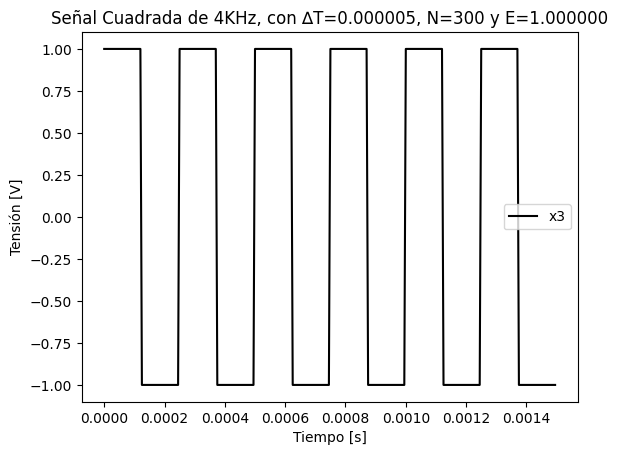

In [129]:
ff = 4000  #Hz

x3=signal.square(2*np.pi*tt*ff)
E=(1/nn)*np.sum(x3**2)

plt.figure()
plt.title('Señal Cuadrada de 4KHz, con ∆T={:f}, N={:d} y E={:f}'.format(Ts,nn,E))
plt.plot(tt, x3, color='black', label='x3')
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.legend()

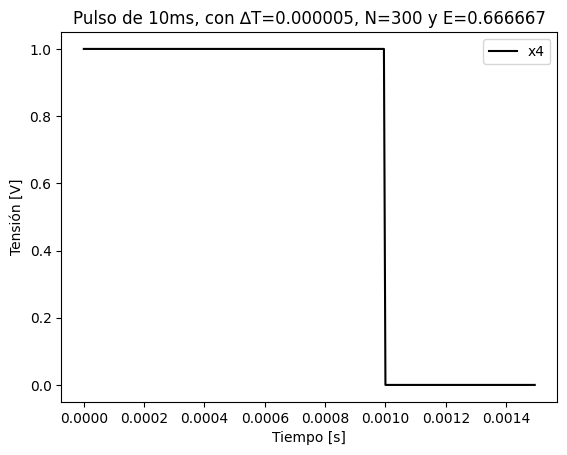

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 

#Defino variables
nn = 300
fs = 200000 #Hz
Ts=1/fs

#Grilla temporal
tt= np.linspace(0,(nn-1)*Ts,nn).flatten()

x4=np.zeros_like(tt)
x4[:200]=1

E=(1/nn)*np.sum(x4**2)

plt.figure()
plt.title('Pulso de 10ms, con ∆T={:f}, N={:d} y E={:f}'.format(Ts,nn,E))
plt.plot(tt, x4, color='black', label='x4')
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.legend()

### 2. Verificar ortogonalidad entre la primera señal y las demás:

In [131]:
o=np.inner(xx,xx)
print("Ortogonalidad entre xx y xx:", o)
o1=np.inner(xx,x1)
print("Ortogonalidad entre xx y x1:", o1)
o2=np.inner(xx,x2)
print("Ortogonalidad entre xx y x2:", o2)
oc=np.inner(xx,xx_clipped)
print("Ortogonalidad entre xx y x1x_clipped:", oc)
o3=np.inner(xx,x3)
print("Ortogonalidad entre xx y xx:", o3)
o4=np.inner(xx,x4)
print("Ortogonalidad entre xx y x4:", o4)

Ortogonalidad entre xx y xx: 150.00000000000006
Ortogonalidad entre xx y x1: 1.2628786905111156e-14
Ortogonalidad entre xx y x2: 5.160802341031001e-15
Ortogonalidad entre xx y x1x_clipped: 69.91154673639473
Ortogonalidad entre xx y xx: 6.522560269672795e-15
Ortogonalidad entre xx y x4: -2.7755575615628914e-15


### 3. Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás

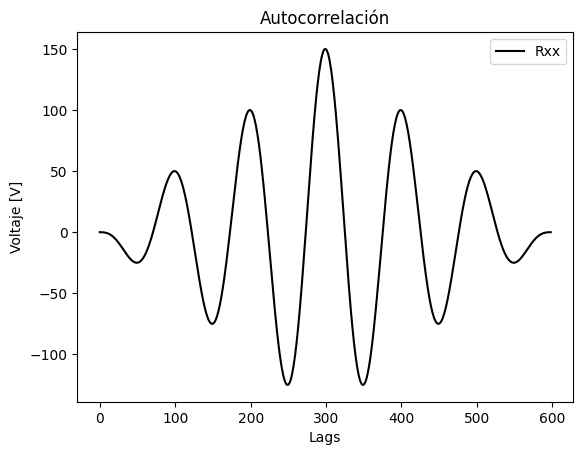

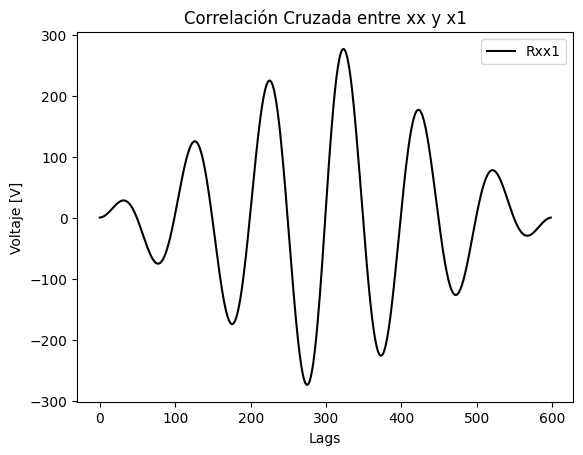

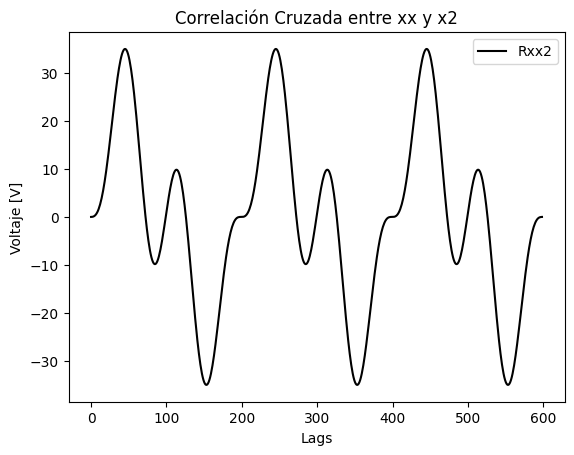

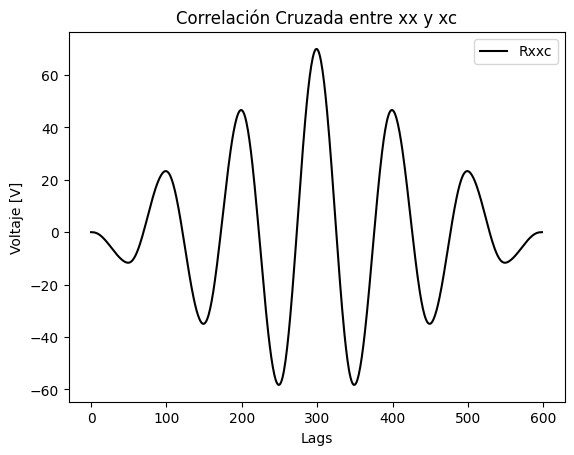

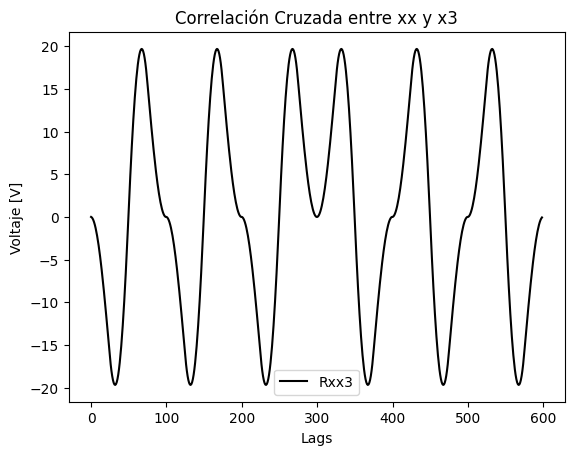

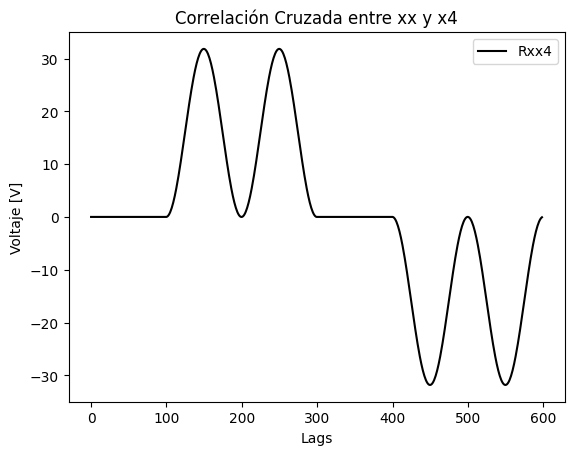

In [132]:
Rxx=signal.correlate(xx,xx)
Rxx1=signal.correlate(xx,x1)
Rxx2=signal.correlate(xx,x2)
Rxxc=signal.correlate(xx,xx_clipped)
Rxx3=signal.correlate(xx,x3)
Rxx4=signal.correlate(xx,x4)

plt.figure()
plt.title("Autocorrelación")
plt.plot(Rxx,color='black',label='Rxx')
plt.xlabel("Lags")
plt.ylabel("Voltaje [V]")
plt.legend()

plt.figure()
plt.title("Correlación Cruzada entre xx y x1")
plt.plot(Rxx1,color='black',label='Rxx1')
plt.xlabel("Lags")
plt.ylabel("Voltaje [V]")
plt.legend()

plt.figure()
plt.title("Correlación Cruzada entre xx y x2")
plt.plot(Rxx2,color='black',label='Rxx2')
plt.xlabel("Lags")
plt.ylabel("Voltaje [V]")
plt.legend()

plt.figure()
plt.title("Correlación Cruzada entre xx y xc")
plt.plot(Rxxc,color='black',label='Rxxc')
plt.xlabel("Lags")
plt.ylabel("Voltaje [V]")
plt.legend()

plt.figure()
plt.title("Correlación Cruzada entre xx y x3")
plt.plot(Rxx3,color='black',label='Rxx3')
plt.xlabel("Lags")
plt.ylabel("Voltaje [V]")
plt.legend()

plt.figure()
plt.title("Correlación Cruzada entre xx y x4")
plt.plot(Rxx4,color='black',label='Rxx4')
plt.xlabel("Lags")
plt.ylabel("Voltaje [V]")
plt.legend()

### 3.Dada la siguiente propiedad trigonométrica:

                                                    2⋅sin(α)⋅sin(β)=cos(α−β)−cos(α+β)

i. Demostrar la igualdad

ii. Mostrar que la igualdad se cumple con señales sinosoidales, considerando α=ω⋅t, el doble de β (Use la frecuencia que desee).

In [133]:
from IPython.display import IFrame
IFrame("./TS1_EJ3.jpg", width=1000, height=1200)

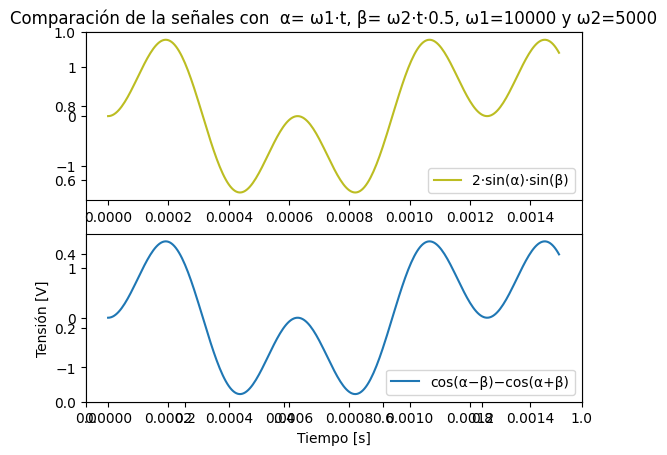

In [134]:
zz=2*np.sin(10000*tt)*np.sin(5000*tt)
yy=np.cos(10000*tt-5000*tt)-np.cos(10000*tt+5000*tt)

plt.figure()
plt.title('Comparación de la señales con  α= ω1⋅t, β= ω2⋅t⋅0.5, ω1=10000 y ω2=5000')
plt.subplot(211)
plt.plot(tt, zz, color='tab:olive',label='2⋅sin(α)⋅sin(β)')
plt.legend()
plt.subplot(212)
plt.plot(tt, yy, color='tab:blue', label='cos(α−β)−cos(α+β)')
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.legend()

### Conclusiones

Para el análisis de ortogonalidad, comenzamos evaluando la señal de referencia en relación consigo misma. Se observa que el valor tiene una magnitud considerable, lo cual es esperado ya que se está calculando el producto interno de la señal contra sí misma en la misma fase.

Posteriormente, se analizó la ortogonalidad entre la señal de referencia y la señal sinusoidal de 2 kHz amplificada y desfasada en π/2. Esta correlación produce un número muy pequeño que puede considerarse como cero, lo cual tiene sentido porque son dos señales senoidales desfasadas en π/2.

Respecto a la ortogonalidad entre la señal de referencia y la señal modulada, como se demostró en el ejercicio 3, la señal resultante contiene dos componentes cosenoidales: una en fase y otra con un desfase de 180°. Al integrar estas componentes sobre el período de 3T analizado, el resultado cero, lo que se alinea con el valor de ortogonalidad obtenido, un número del orden de 10⁻¹⁵.

La ortogonalidad entre la señal de referencia y la señal recortada muestra un valor de magnitud considerable, puesto que ambas señales están en fase entre sí. No es tan elevado como en el caso evaluado al inicio, puesto que las señales no tienen la misma amplitud. 

El análisis de ortogonalidad entre el seno de 2 kHz y la onda cuadrada es más complejo. Si consideramos la onda cuadrada expandida en su serie de Fourier, obtenemos una serie de componentes senoidales de diferentes frecuencias. El producto de senos de diferentes frecuencias, integrado sobre un período completo, da cero. Dado que la ortogonalidad resulta en un valor muy cercano a cero, se puede inducir que la que la onda cuadrada de 4 kHz no incluye ninguna componente de 2 kHz, lo que indica la ausencia de correlación entre estas señales.

En el caso de la autocorrelación, puede observarse que el máximo de amplitud se produce en el centro del gráfico, donde ambas señales coinciden completamente. Este punto debería corresponder a k=0 - desplazamiento nulo - y su valor representa la energía total de la señal.

Hacia los extremos del gráfico, la amplitud decrece progresivamente. Esto tiene sentido ya que, al tratarse de señales finitas, a medida que k aumenta, la señal desplazada se va solapando cada vez menos con la señal original. Conforme el desplazamiento aumenta, la porción de solapamiento entre ambas señales se reduce, y la señal desplazada comienza a multiplicarse por ceros, lo que produce que la amplitud de la autocorrelación en los extremos disminuya gradualmente.

Eventualmente, cuando el desplazamiento es lo suficientemente grande como para que no exista solapamiento en los extremos.

Para los casos de correlación cruzada entre las señales x1, x2, xc y x3, el patrón de la envolvente del gráfico debería ser similar al observado en la autocorrelación, ya que todas las señales involucradas son finitas. En cambio, el caso de la correlación con el pulso presenta características particulares. Se pueden observar picos con forma senoidal para la primera mitad de los lags y en la seguhnda mitad el grafico se espeja de forma invertida. La presencia de las formas senoidales del gráfico indicarían que la señal xx y el pulso comparten varias componentes frecuenciales.  